In [1]:
##Data KAGGLE
import pandas as pd
# importing dataset
df = pd.read_csv("C:/Users/yjzabalam/Downloads/IMDB Dataset.csv")
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [2]:
print(df . describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [3]:
print("Total :\n",df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [4]:


IMDB = pd.DataFrame({'review': ['Great movie!', 'Not bad', 'Terrible film!']})

try:
    
    if 'review' not in IMDB.columns:
        raise ValueError("La columna 'review' no existe en IMDB.")

    sentences = list(IMDB['review'])
    
    review = []
    for sen in sentences:
        review.append(sen)
    
    print(review)
except Exception as e:
    print(f"Se produjo un error: {e}")


['Great movie!', 'Not bad', 'Terrible film!']


In [5]:
import pandas as pd
import numpy as np


IMDB = pd.DataFrame({'sentiment': ['positive', 'negative', 'positive', 'negative']})

try:
  
    if 'sentiment' not in IMDB.columns:
        raise ValueError("La columna 'sentiment' no existe en IMDB.")
    
    # Convierte la columna en un array de NumPy con valores binarios
    labels = IMDB['sentiment'].fillna('unknown')  # Maneja posibles NaN
    labels = np.array([1 if x == "positive" else 0 for x in labels])
    
    print(labels)
except Exception as e:
    print(f"Se produjo un error: {e}")


[1 0 1 0]


In [6]:
# Check the lengths of review and labels
print(f"Length of review: {len(review)}")
print(f"Length of labels: {len(labels)}")

# Ensure they are the same length before splitting
if len(review) == len(labels):
    train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)
else:
    print("The lengths of review and labels do not match. Please check your data.")


Length of review: 3
Length of labels: 4
The lengths of review and labels do not match. Please check your data.


In [7]:
from sklearn.model_selection import train_test_split

# Verificar las longitudes de review y labels
print(f"Longitud de review: {len(review)}")
print(f"Longitud de labels: {len(labels)}")

# Asegurarse de que tengan la misma longitud antes de dividir
if len(review) == len(labels):
    train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)
    print("Datos divididos correctamente.")
else:
    # Ajustar las longitudes para que coincidan
    min_length = min(len(review), len(labels))
    review = review[:min_length]
    labels = labels[:min_length]
    
    train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)
    print("Datos ajustados y divididos correctamente.")

# Imprimir las longitudes de los conjuntos de entrenamiento y prueba
print(f"Longitud de train_sentences: {len(train_sentences)}")
print(f"Longitud de test_sentences: {len(test_sentences)}")
print(f"Longitud de train_labels: {len(train_labels)}")
print(f"Longitud de test_labels: {len(test_labels)}")


Longitud de review: 3
Longitud de labels: 4
Datos ajustados y divididos correctamente.
Longitud de train_sentences: 2
Longitud de test_sentences: 1
Longitud de train_labels: 2
Longitud de test_labels: 1


In [8]:
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type= 'post'
oov_tok ="<OOV>"


In [15]:
!pip install keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics= ['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.7022 - val_accuracy: 0.0000e+00 - val_loss: 0.7700
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.6241 - val_accuracy: 0.0000e+00 - val_loss: 0.8371
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 1.0000 - loss: 0.5697 - val_accuracy: 0.0000e+00 - val_loss: 0.9120
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 0.5153 - val_accuracy: 0.0000e+00 - val_loss: 1.0124
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 0.4523 - val_accuracy: 0.0000e+00 - val_loss: 1.1473
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.3821 - val_accuracy: 0.0000e+00 - val_loss: 1.3269
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.3080 - val_accuracy: 0.0000e+00 - val_loss: 1.5616
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.2348 - val_accura

<Axes: >

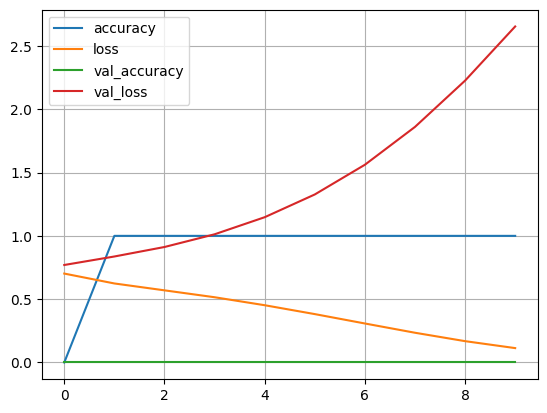

In [22]:
num_epochs = 10

history= model.fit(padded,
                  train_labels,
                  epochs=num_epochs,
                 validation_data=(test_padded, test_labels))
pd.DataFrame(history.history).plot(grid=True)